# 🐨 COSADAMA Intermediate Data Science week 6 - EDA

## Exploratory Data Analysis : 탐색적 데이터 분석

당뇨병인지? 아닌지?   
어떤 데이터들이 어떤 특징을 가졌는지 알아보고, 이 과정을 통해 어떤 feature를 전처리 해주면 좋을지!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.info() # 결측치가 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**결측치 확인**

In [6]:
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
df_null.sum() #no null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe(include='number') #summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


중앙값, 1/4분위 값 등...   평균값이 중위보다 높음. max 값이 크기 때문에 평균이 중위보다 크다고 볼 수 있음. 편차도 약간 큰 편!   
glucose 1/4분위 값이 99인데...min이 0? 값이 결측치가 아닌가? bloodpressure도 min이 0. 혈압이 0이 될 수 없고, 피부 주름 두께도 0이라는 값이 모두 결측치 같다.

**가장 마지막에 있는 outcome은 label 값이기 때문에 제외하고 학습과 예측에 사용할 컬럼을 만든다. feature_columns라는 변수에 담아준다.**

In [14]:
feature_columns = df.columns[:-1]
feature_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### 결측치 시각화

0인 값을 결측치로 처리하고 시각화하기

In [15]:
cols =feature_columns[1:]

In [16]:
cols

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

결측치 여부를 나타내는 데이터프레임 만들기, 0값을 결측치라 가정하고(label, target) 값을 제외한 컬럼에 대해 결측치 여부를 구해서 df_null이라는 데이터 프레임에 담는다.

In [17]:
df_null=df[cols].replace(0,np.nan)
df_null

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [19]:
df_null=df_null.isnull()

In [20]:
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

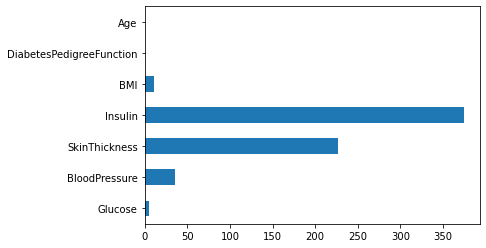

In [21]:
df_null.sum().plot.barh()

In [23]:
df_null.mean()*100 # 데이터 결측치 퍼센트

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

결측치를 heatmap으로 시각화

<AxesSubplot:>

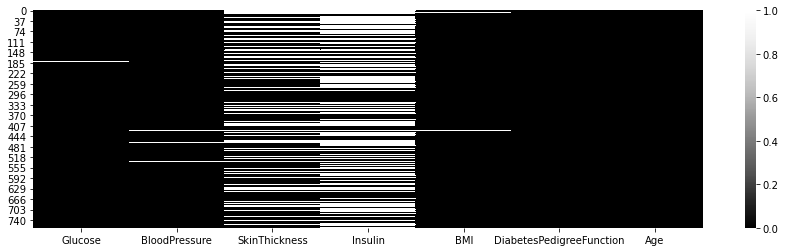

In [26]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

### 정답값

예측해야 하는 정답값은? 당뇨병 발병 여부!

In [27]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

정답값의 빈도수 세기

In [28]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
df['Outcome'].value_counts(normalize=True) # 발병비율 35%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

다른 변수와 함께 확인하기. 임신횟수와 정답값을 비교한다. pregnancies를 groupby로 그룹화해서 outcome에 대한 비율을 구한다. 결과를 df_po라는 변수에 저장한다.

In [30]:
df.groupby(['Pregnancies'])['Outcome'].mean() # index에 올 값을 groupby 안에, index는 뒤의 리스트 형태로

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

임신횟수가 많을수록 발병확률이 높음

In [33]:
df_po=df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index() # 여러개의 연산 agg([list])
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

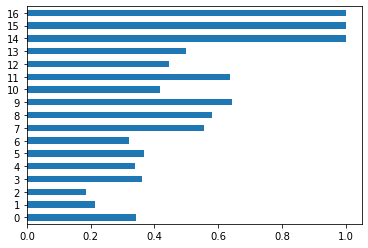

In [37]:
# 임신 횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.barh(rot=0)

### Countplot

위에서 구했던 당뇨병 발병 비율을 구해본다.   
* 당뇨병 발병 빈도수를 비교한다.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

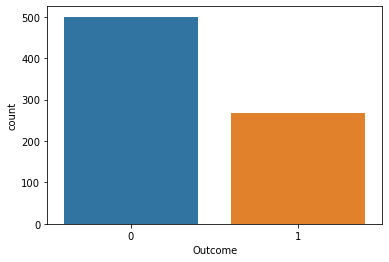

In [39]:
sns.countplot(data=df,x='Outcome')

* 임신횟수에 따른 당뇨병 발병 빈도수 비교

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

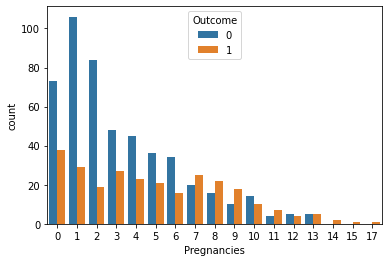

In [41]:
sns.countplot(data=df, x='Pregnancies', hue='Outcome') # 임신 빈도수, 포토샵(다른색상을 표현할래)

decision tree 알고리즘 예측으로는 가지를 계속 치는데, 조건이 많아지면 overfit 현상 -> 케이스가 적은경우   
이럴 때 범주화해서 표현, pregnancies_high 특정 임신 횟수 이상, 이하로 나눠서

In [42]:
df['Pregnancies_high']=df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

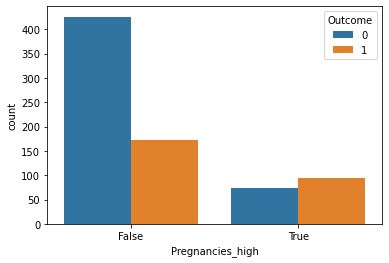

In [45]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

6회 미만 케이스가 훨씬 많고, 횟수가 많으면 발병률도 높아진다.   
* countplot을 그려서 특정 횟수가 넘어가면 발병률이 높아짐 연속된 수치 데이터는 범주화한다. 만약 값이 여러개의 범주라면 이런 값들을 another encoding...?을 한다?

### Barplot

* 당뇨병 발병에 따른 BMI 수치

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

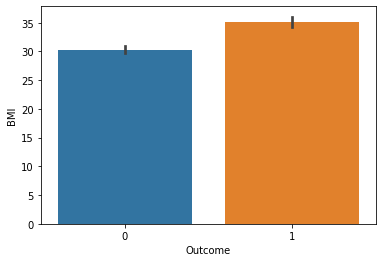

In [46]:
sns.barplot(data=df, x='Outcome', y='BMI')

* 당뇨병 발병에 따른 Glucose 수치

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

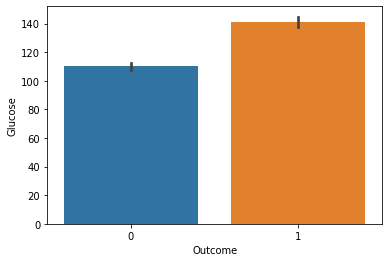

In [48]:
sns.barplot(data=df, x='Outcome', y='Glucose')

* Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

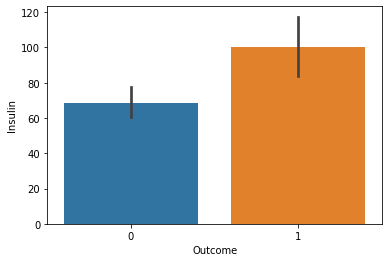

In [49]:
sns.barplot(data=df, x='Outcome', y='Insulin') # estimator=<function mean at 0x000001EFA8555B88>

검정색 막대는 bootstrap 일부 샘플링 데이터 95% 신뢰구간이 ci=95 신뢰구간 값의 범위, 이가 조금 크네요

* 임신횟수에 대해서 당뇨병 발병 비율을 비교

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

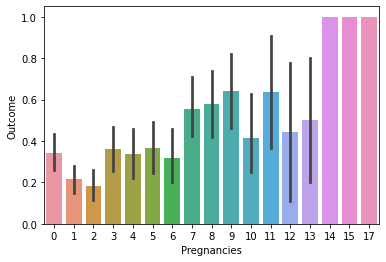

In [51]:
sns.barplot(data=df, x='Pregnancies', y='Outcome')

* 임신횟수에 따른 포도당(Glucose)수치를 당뇨병 발병여부에 따라 시각화한다

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

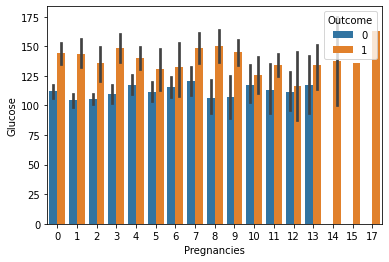

In [53]:
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

당뇨병 발병 여부에 따라서 Glucose의 수치를 나타냄

* 임신횟수에 따른 BMI를 당뇨병 발병여부에 따라 시각화

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

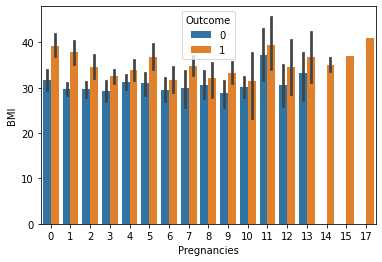

In [54]:
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

* 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화   

    인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

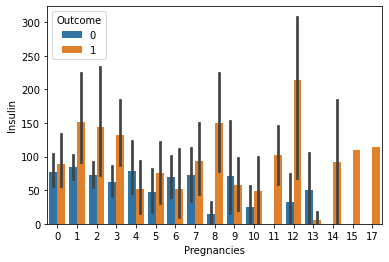

In [56]:
sns.barplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

### Boxplot

barplot은 신뢰구간의 차이가 많이남. 평균값으로 구하기 때문 boxplot은 최대 최소를 그려주고, 주저 앉은 이유는 인슐린 값이 0인 값이 많아서!   
인슐린 값이 0보다 큰 값에 대해서만 그려야함

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

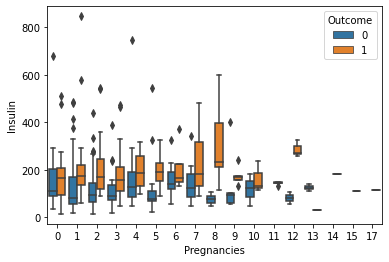

In [58]:
sns.boxplot(data=df[df.Insulin > 0], x='Pregnancies', y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

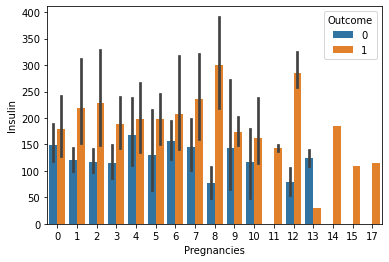

In [59]:
sns.barplot(data=df[df.Insulin > 0], x='Pregnancies', y='Insulin', hue='Outcome')

### Violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

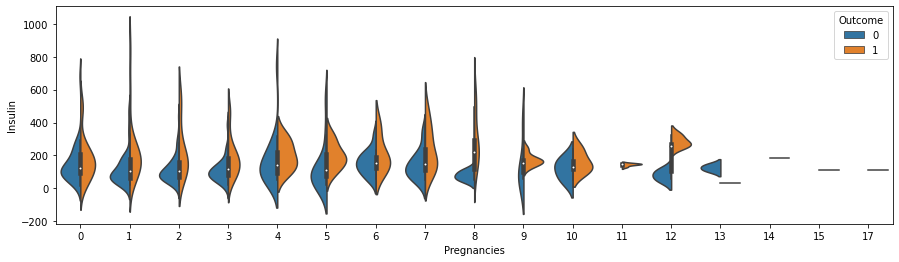

In [61]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df.Insulin > 0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

### Swarmplot

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

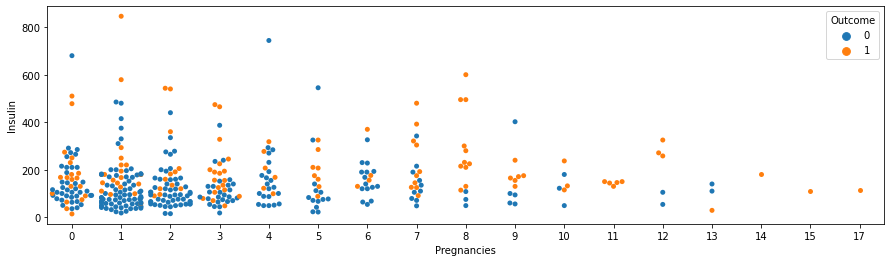

In [63]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df.Insulin > 0], x='Pregnancies', y='Insulin', hue='Outcome')

### Distplot   
Histogram + 커널 밀도 함수 추정해서 그려주는 그래프   
연속된 수치형 데이터를 시각화, 범주형 컬럼으로 나눠주고 싶을 때 어떤 값으로 나눠야할까?

* 임신횟수에 따른 당뇨병 발병 여부를 시각화

In [21]:
# esc + a : 새로운 셀 위에 만들기
df_0= df[df['Outcome']==0]
df_1=df[df['Outcome']==1]
df_0.shape, df_1.shape

((500, 9), (268, 9))

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

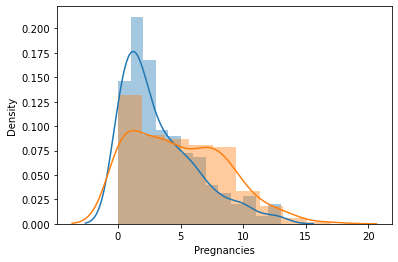

In [7]:
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

5 이후 발병하는 케이스가 많다.

* 나이에 따른 당뇨병 발병 여부

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

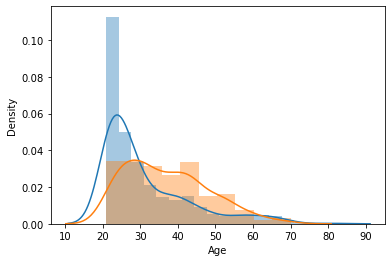

In [10]:
sns.distplot(df_0['Age'])
sns.distplot(df_1['Age'])

30세 이후에 발병률이 더 높다.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-pack

<AxesSubplot:xlabel='Age', ylabel='Density'>

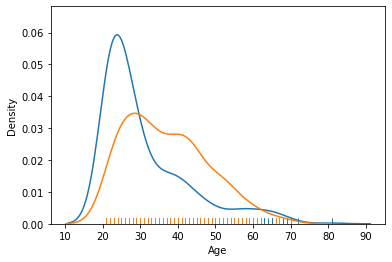

In [13]:
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

모든 수치형 변수에 대해 그리기 : 서브플롯

### Subplots

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

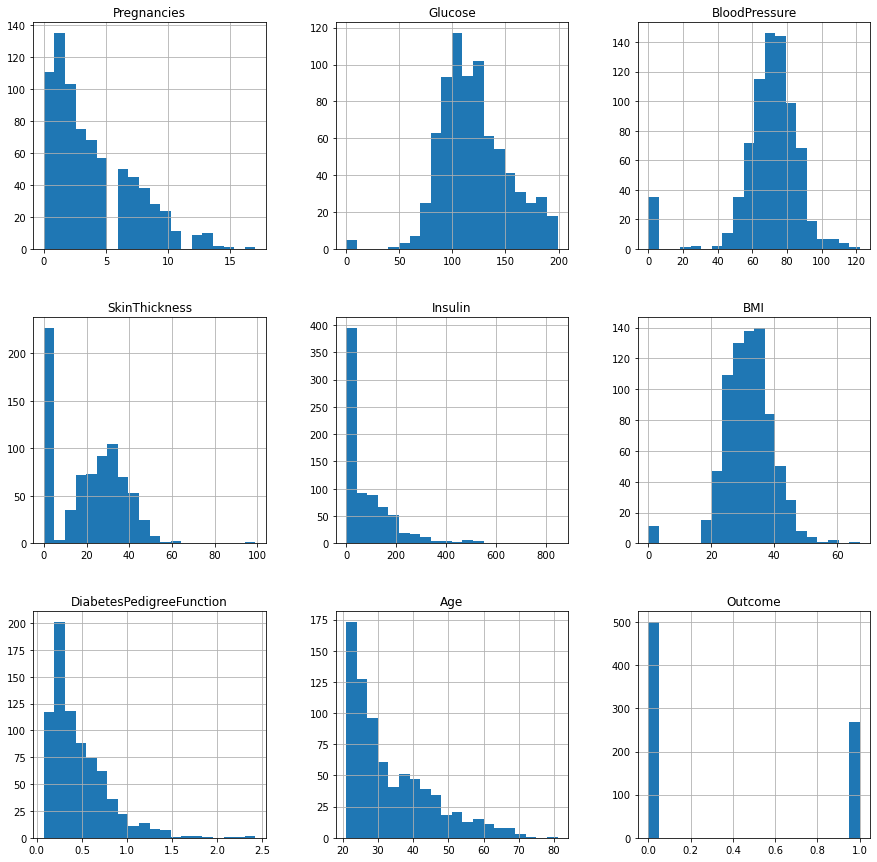

In [3]:
df.hist(figsize=(15,15), bins=20)

In [16]:
col_name = df.columns[:-1]
col_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
col_num=df.columns.shape
col_num

(9,)

#### Displot

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

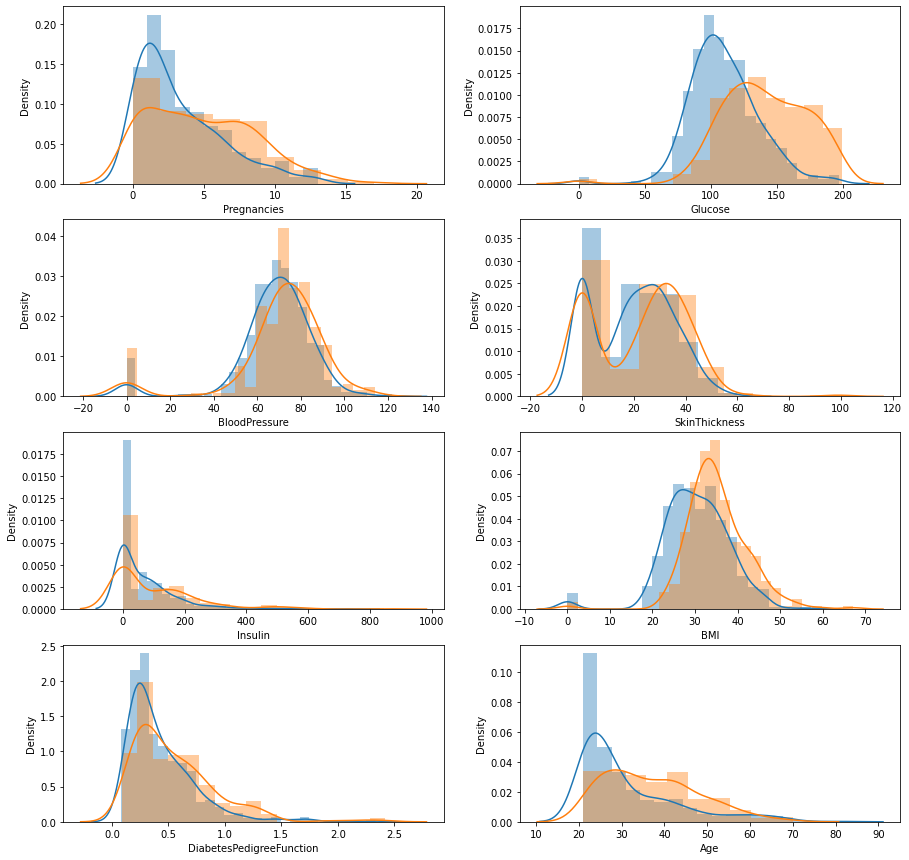

In [23]:
# displot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols):
    row=i//2
    col=i%2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

In [22]:
df_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


특정 값을 기준으로 높고 낮고, 발병률이 올라감, BMI 지수가 높은 사람들이 발병률이 높긴하다.   
수치형 변수를 outcome 값에 따라서 예측하고자 하는 값에 따라서 구분을 해보고, 특정 값에 따라서 비교가 되면 연속된 수치 변수를 범주형으로 바꾸어볼 수 있다.

#### violinplot

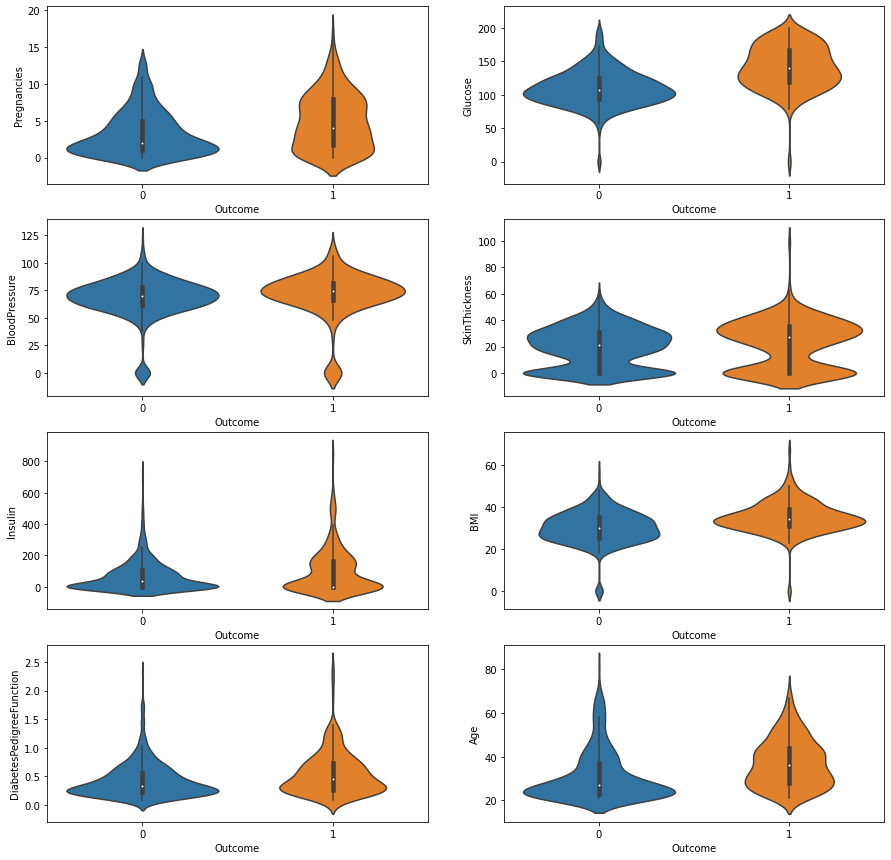

In [25]:
#violinplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols):
    row=i//2
    col=i%2
    sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])
    #sns.distplot(df_1[col_name], ax=axes[row][col])

0에 몰린 값은 결측치

#### Implot

* 상관계수가 높은 두 변수에 대해 시각화

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

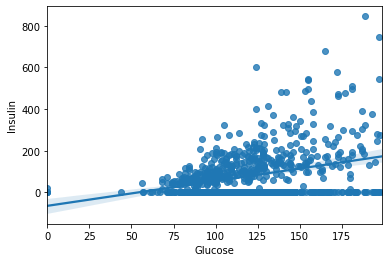

In [26]:
# Glucose와 Insulin을 outcome으로 구분해보기

sns.regplot(data=df, x='Glucose', y='Insulin')

regplot은 색상 변환 지원하지 않는다.

* Insulin 수치가 0이상인 데이터로만 그리기

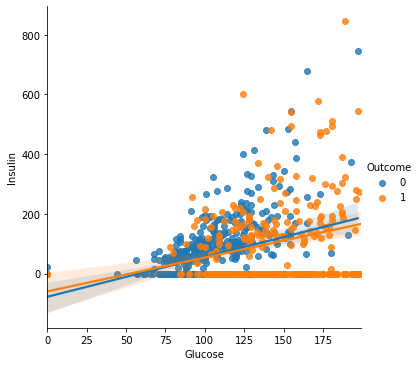

In [6]:
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

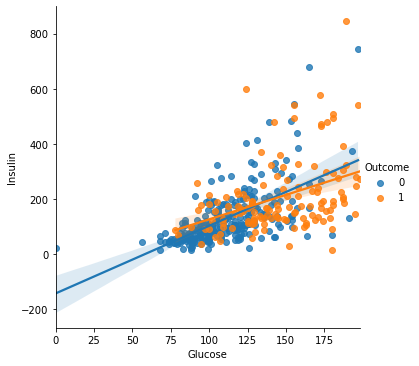

In [5]:
sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

### pairplot

* pairgrid를 통해 모든 변수에 대해 outcome에 따른 scatterplot을 그린다.

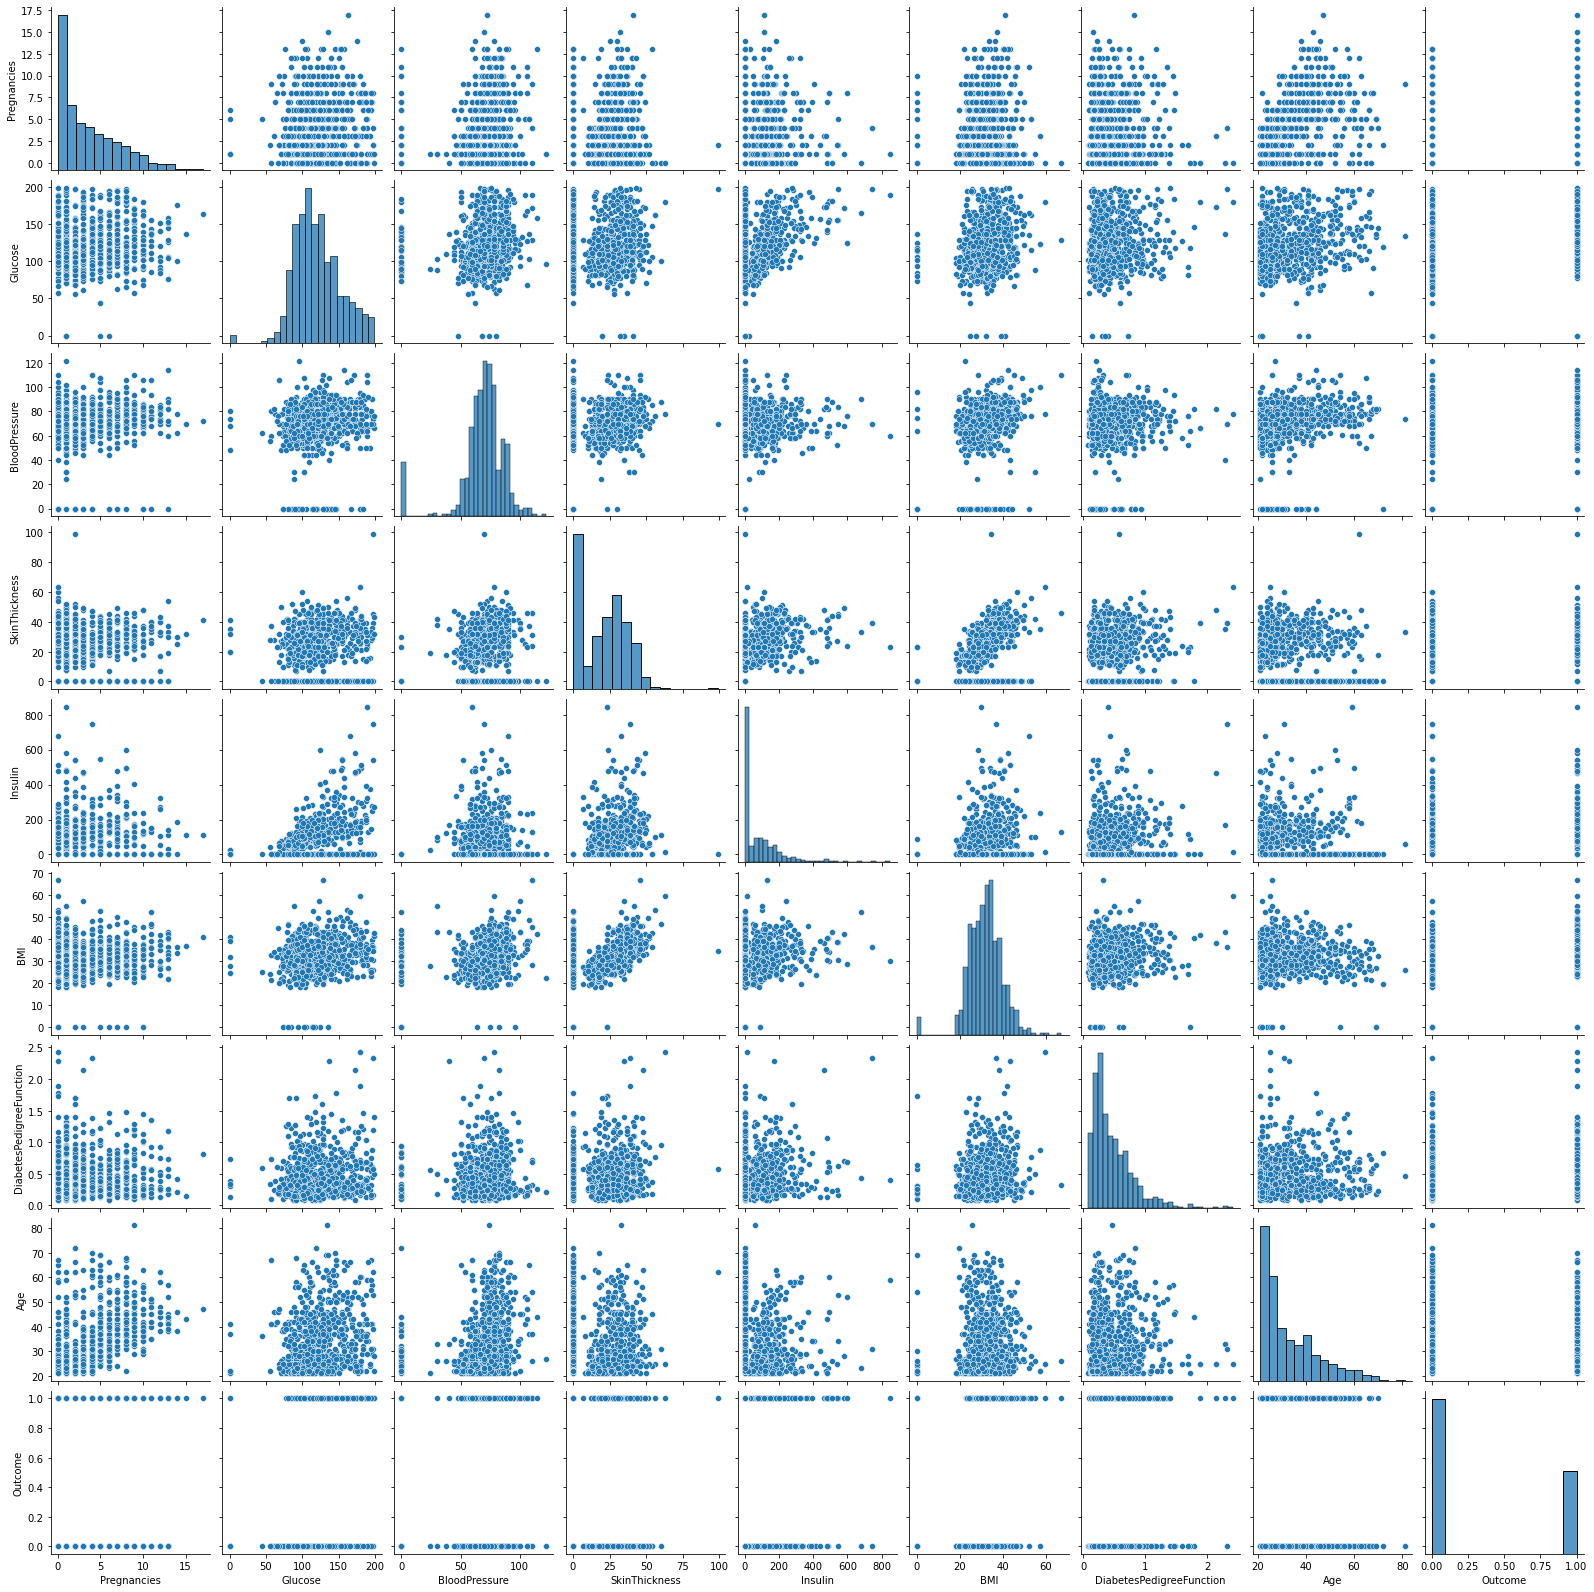

In [7]:
sns.pairplot(df)

모든 수치에 대해 그려준다. 모든 변수에 대해 x,y 교차해서 scatterplot...

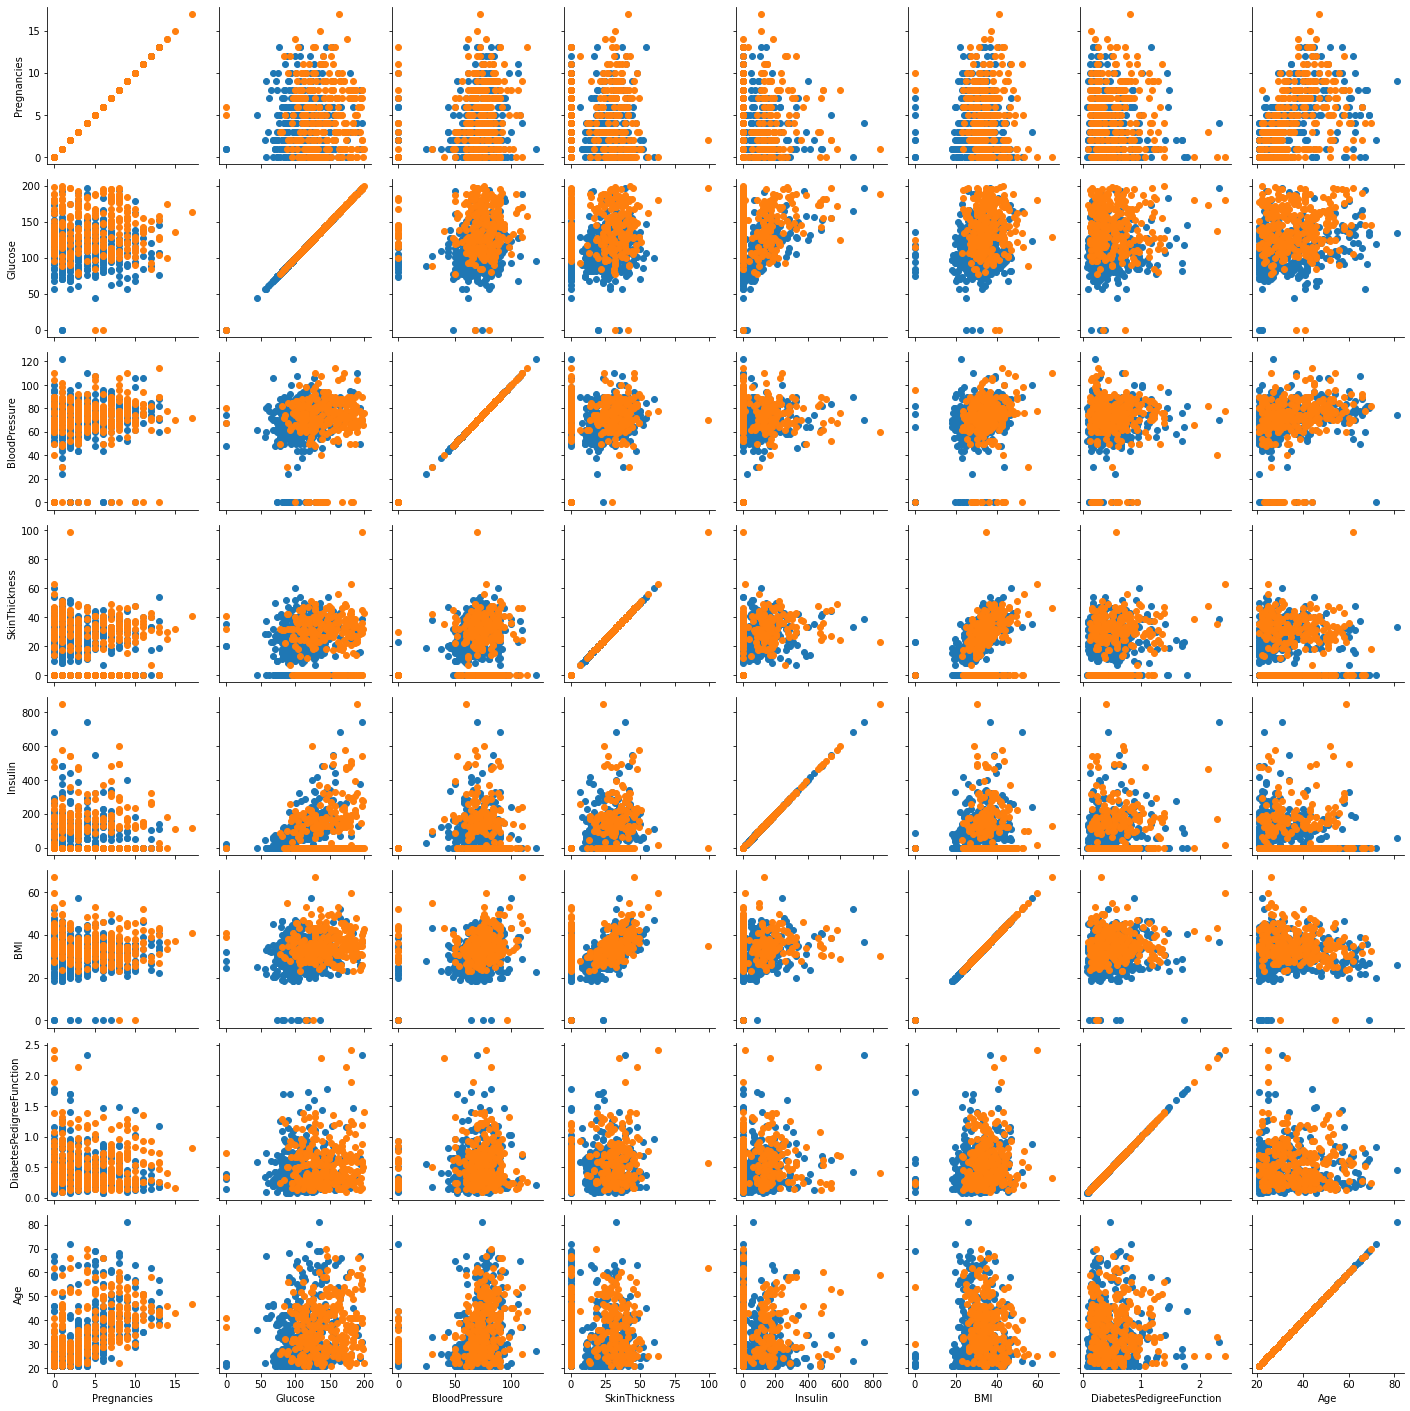

In [8]:
g=sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)


전체적인 수치 데이터에 대한 분포 확인할 때 변수간의 상관관계 파악이 용이하다.   
pairplot 등.

### 상관분석

예측하고자 하는 값, 당뇨병 여부 어느 변수와 상관관계가 있는지 분석하기 위함!   
두 변수는 독립, 상관인 관계 이 때 두 변수간의 연관된 정도, 인과는 아님 관계의 강도를 상관관계라고 한다.   

* 결측치 처리하지 않고 상관계수를 구함

In [20]:
# 결측치 처리 X
df_corr=df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


* 위에서 구한 상관계수를 heatmap으로 시각화

<AxesSubplot:>

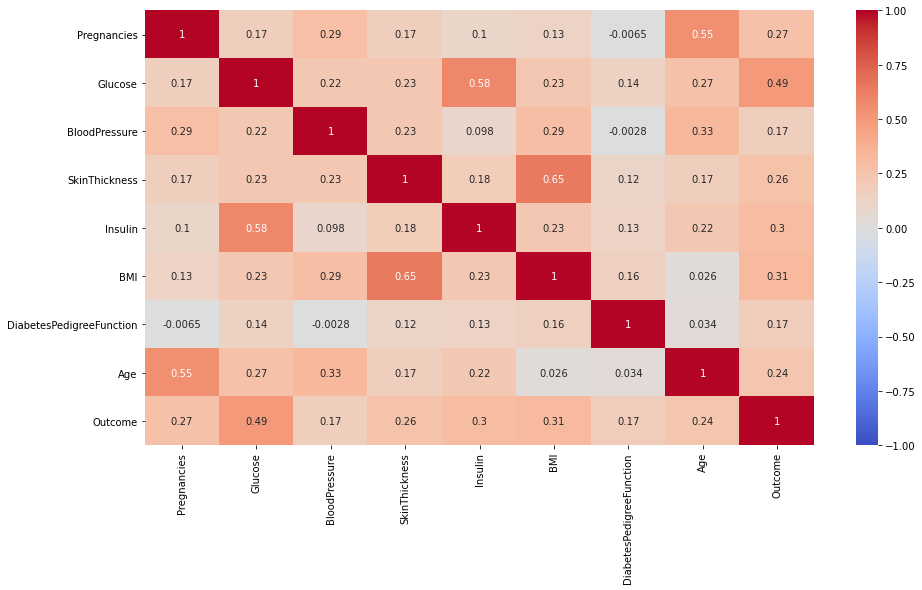

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True,vmax=1, vmin=-1, cmap='coolwarm')

* 결측치 처리

In [16]:
df.iloc[:,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df_matrix= df.iloc[:,:-1].replace(0,np.nan)
df_matrix['Outcome']=df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


* outcome 수치에 대한 상관계수만 모아서 보기

In [22]:
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

#### 상관계수가 높은 변수끼리 보기

* Insulin & Glucose regplot

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

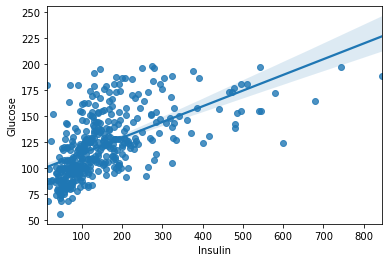

In [23]:
sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

* Age Pregnancies regplot

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

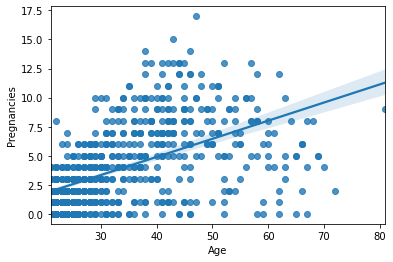

In [24]:
sns.regplot(data=df, x='Age', y='Pregnancies')

* Age, Pregnancies lmplot & hue outcome

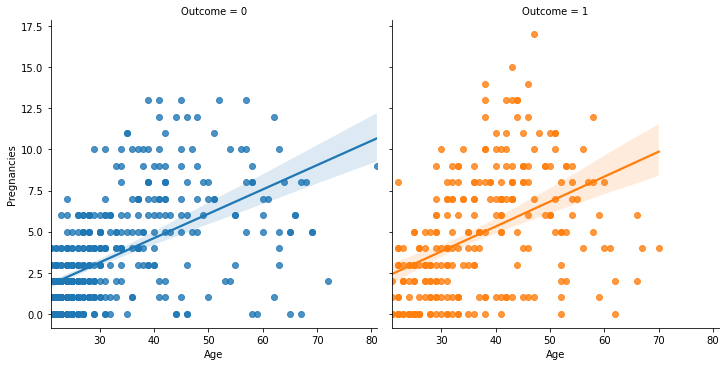

In [26]:
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')

In [ ]:
outcome 값을 예측하기 위해서 어떤 변수를 어떻게 쓰면 좋을지, eda를 통해 단서를 얻음    
인슐린 처리, outlier를 어떻게 처리할ㅈ